run following command before starting <br/>
```
source /cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-gcc8-opt/setup.csh
```

In [1]:
import ROOT
import math

Welcome to JupyROOT 6.24/00


In [2]:
tf = ROOT.TFile.Open("root://cmseos.fnal.gov//store/user/amankel/photon_seed_fixed/nopu/2photons_E100_eta2p0_nopu/12042911/ntuple/ntuple_combined.root")
tree = tf.Get("hgcAnalyzer/tree")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
def dist(v1,v2):
    return math.sqrt((v1.X()-v2.X())**2+(v1.Y()-v2.Y())**2+(v1.Z()-v2.Z())**2)

In [7]:
tklc_pos = []
lc_pos = []
for it,t in enumerate(tree):
    
    if len(t.tracksterMerge_vertices) < 1: # at least one trackster
        continue
    
    #if t.tracksterMerge_raw_energy[0] > 60: # look for some low energy trackster events (less than 60GeV)
    #    continue
        
    #di = dist(t.genParticlePosition[0],t.genParticlePosition[1]) #gen-particles position
    #if di<2 or di>3.5: #resolving distance
    #    continue
    
    if it == 10: #selecting single event
        for v in t.tracksterMerge_vertices:
            tmp=[]
            for ilc,lc in enumerate(t.lcId):
                if lc in v:
                    tmp.append((t.lcPosition[ilc].X(),t.lcPosition[ilc].Y(),t.lcPosition[ilc].Z()))
                else:
                    lc_pos.append((t.lcPosition[ilc].X(),t.lcPosition[ilc].Y(),t.lcPosition[ilc].Z()))
            tklc_pos.append(tmp)
            
        print ("current event ID is",it)
        break

current event ID is 10


In [8]:
print ("number of tracksters =", len(tklc_pos))

number of tracksters = 2


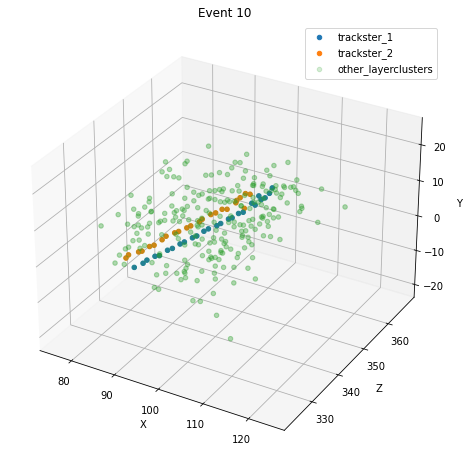

In [9]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
for tk_lc in tklc_pos:
    tx=[x[0] for x in tk_lc]
    ty=[x[1] for x in tk_lc]
    tz=[x[2] for x in tk_lc]
    ax.scatter(tx, tz, ty,alpha=1)
lcx=[x[0] for x in lc_pos]
lcy=[x[1] for x in lc_pos]
lcz=[x[2] for x in lc_pos]
ax.scatter(lcx, lcz, lcy,alpha=0.2)
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')
ax.legend(['trackster_1','trackster_2','other_layerclusters'])
plt.title("Event 10")
plt.show()